Inside Main function
       39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical   No

AttributeError: 'DataFrame' object has no attribute 'strip'

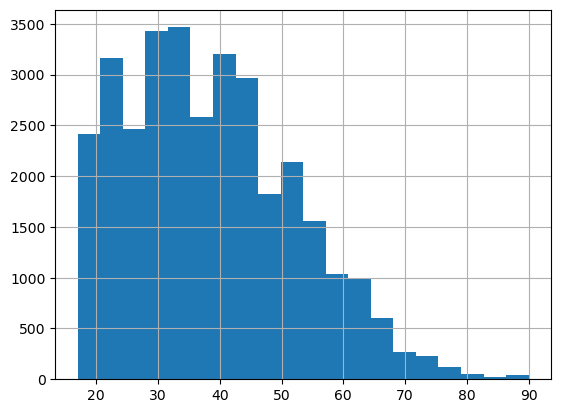

In [16]:
"""
Week 3 & 4 Exercises
"""

from __future__ import print_function
from itertools import zip_longest

import csv
import logging
import sys
import numpy as np
import pandas as pd
import random
import thinkplot
import thinkstats2
import datetime
import regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math


def ReadData(filename='Boston_housing.csv'):
    ### Read in the Boston housing data set (given as a .csv file) from the local directory

    df = pd.read_csv(filename)
    return df

def PlotHistogram(df1):
    for c in df1.columns:
        plt.title("Plot of "+c,fontsize=15)
        plt.hist(df1[c],bins=20)
        plt.show()

def Createscatterplot(df1):
    plt.scatter(df1['CRIM'],df1['PRICE'])
    plt.show()

def CreatePlotUsingLog10(df1):
    plt.scatter(np.log10(df1['CRIM']),df1['PRICE'],c='red')
    plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
    plt.xlabel("Log of Crime rate",fontsize=15)
    plt.ylabel("Price",fontsize=15)
    plt.grid(True)
    plt.show()


def CalculateMeanmedianAndpercentage(df1):
    ### Calculate mean rooms per dwelling
    print ('mean rooms per dwelling :', df1['RM'].mean());

    ### Calculate median age
    print('median Age :', df1['AGE'].median());

    ### Calculate average (mean) distances to five Boston employment centres
    print('mean distances to five Boston employment centres :',df1['DIS'].mean())

    ### calculate the percentage of houses with low price (< $20,000)
    # Create a Pandas series and directly compare it with 20 and we can do this because Pandas series is basically Numpy array and you have seen how to filter Numpy array
    low_price=df1['PRICE']<20
    # This creates a Boolean array of True, False
    print(low_price)
    # True = 1, False = 0, so now if you take an average of this Numpy array, you will know how many 1's are there.
    # That many houses are priced below 20,000. So that is the answer. 
    # You can convert that into percentage by multiplying with 100
    pcnt=low_price.mean()*100
    print("\nPercentage of house with <20,000 price is: ",pcnt)


def strip_whitespace(s):
    return s.strip()

def Activity5_Excercise():

    ### Read in the Boston housing dataset (given as a .csv file) from the local direction:
    filename='Boston_housing.csv'
    df = ReadData(filename);

     ### Check first 10 records
    df.head(10)
    print (df)

    ### Find the total number of records:
    print(df.shape)

    ### Create a smaller DataFrame with columns which do not include 'CHAS', 'NOX', 'B', and 'LSTAT'
    df1=df[['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','PRICE']]

    ### Check the last 7 records of the new DataFrame you just created
    df1.tail(7)
    print (df1)

    ### Plot histograms of all the variables (columns) in the new DataFrame by using a for loop:
    ### Plot them all at once using a for loop. Try to add a unique title to a plot.
    PlotHistogram(df1)

    ### Crime rate could be an indicator of house price (people don't want to live in highcrime areas). 
    ### Create a scatter plot of crime rate versus price:
    Createscatterplot(df1)

    ### Plot using log10(crime) versus price.
    CreatePlotUsingLog10(df1)

    ### Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston employment centers, and the percentage of houses
    ##  with a low price (< $20,000).
    CalculateMeanmedianAndpercentage(df1)


def Activity6_Excercise():

    ### Load the files
    df = pd.read_csv("adult_income_data.csv")
    df.head()
    print (df)

    ### Create a script that will read a text file line by line.
    names = []
    with open('adult_income_names.txt','r') as f:
        for line in f:
            f.readline()
            var=line.split(":")[0]
            names.append(var)

    print (names)
    
    ### Add a name of Income for the response variable to the dataset.
    names.append('Income')
    df = pd.read_csv("adult_income_data.csv",names=names)
    df.head()
    print (df)

    ### Find the missing values.
    print('Find the missing values :', df.describe())

    ### Create a DataFrame with only age, education, and occupation by using subsetting.
    vars_class = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
    for v in vars_class:
        classes=df[v].unique()
        num_classes = df[v].nunique()
        print("There are {} classes in the \"{}\" column. They are: {}".format(num_classes,v,classes))
        print("-"*100)
    
    print ('Is there any missing (NULL) data in the dataset :', df.isnull().sum())

    df_subset = df[['age','education','occupation','race']]
    df_subset.head()
    print (df_subset)

    ### Plot a histogram of age with a bin size of 20.

    df_subset['age'].hist(bins=20)

    ### Create a function to strip the whitespace characters.
    strip_whitespace(df)

    ### Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

    # Education column
    df_subset['education_stripped']=df['education'].apply(strip_whitespace)
    df_subset['education']=df_subset['education_stripped']
    df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

    # Occupation column
    df_subset['occupation_stripped']=df['occupation'].apply(strip_whitespace)
    df_subset['occupation']=df_subset['occupation_stripped']
    df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

    # Race column
    df_subset['race_stripped']=df['race'].apply(strip_whitespace)
    df_subset['race']=df_subset['race_stripped']
    df_subset.drop(labels=['race_stripped'],axis=1,inplace=True)

    ### Find the number of people who are aged between 30 and 50.
    df_filtered=df_subset[(df_subset['race']=='Black') & (df_subset['age']>=30) & (df_subset['age']<=50)]
    df_filtered.head()
    answer_1=df_filtered.shape[0]
    print("There are {} black people of age between 30 and 50 in this dataset.".format(answer_1))

    ### Group the records based on age and education to find how the mean age is distributed.

    print("Group the records based on age and education : ", df_subset.groupby(['race','education']).mean())

    ### Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest

    print('Group by occupation and show the summary statistics of age :' , df_subset.groupby('occupation').describe()['age'])

    ### share of the workforce above the 75th percentile.
    print ('share of the workforce above the 75th percentile :', df_subset.groupby('occupation').describe()['age'])
   
    ### Use subset and groupby to find outliers.
    ### Plot the values on a bar chart.
    ### Merge the data using common keys.

    occupation_stats= df_subset.groupby('occupation').describe()['age']
    plt.figure(figsize=(15,8))
    plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
    plt.yticks(fontsize=13)
    plt.show()

def main():
    print('Inside Main function')

    ### Activity 5: Generating Statistics from a CSV File
    #Activity5_Excercise()

    ### Activity 6: Working with the Adult Income Dataset (UCI)
    Activity6_Excercise()

if __name__ == "__main__":
    main()
    